# Chapter 2

En este capítulo haré una exploración de mis datos y una visualización de lo que tengo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("e:/piere/Documentos/Portafolio/JMIA/Data/RAW/JMIA.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-12,18.950001,25.459999,18.260000,25.459999,25.459999,9472300
1,2019-04-15,26.940001,39.950001,25.629999,31.910000,31.910000,12857300
2,2019-04-16,35.330002,43.500000,33.099998,43.040001,43.040001,12939400


In [4]:
df["Date"]=df["Date"].astype("datetime64[ns]")
df=df.set_index("Date")

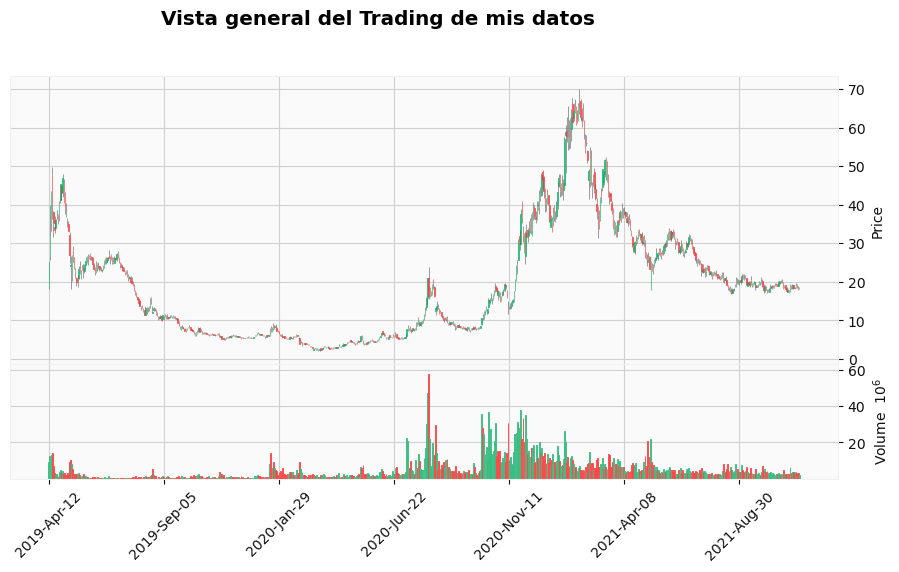

In [5]:
mpf.plot(df,type="candle",volume=True,style="yahoo",figratio = (2, 1),title="Vista general del Trading de mis datos")


Al observar los datos de la anterior grafica podemos observar que tenemos una amplia gama de datos, concentrada en dos años. Para efectos de poder observar mejores los cambios en la cotización de la bolsa, separare mis datos por año 

In [6]:
df_2019=df[df.index.year==2019]
df_2020=df[df.index.year==2020]
df_2021=df[df.index.year==2021]

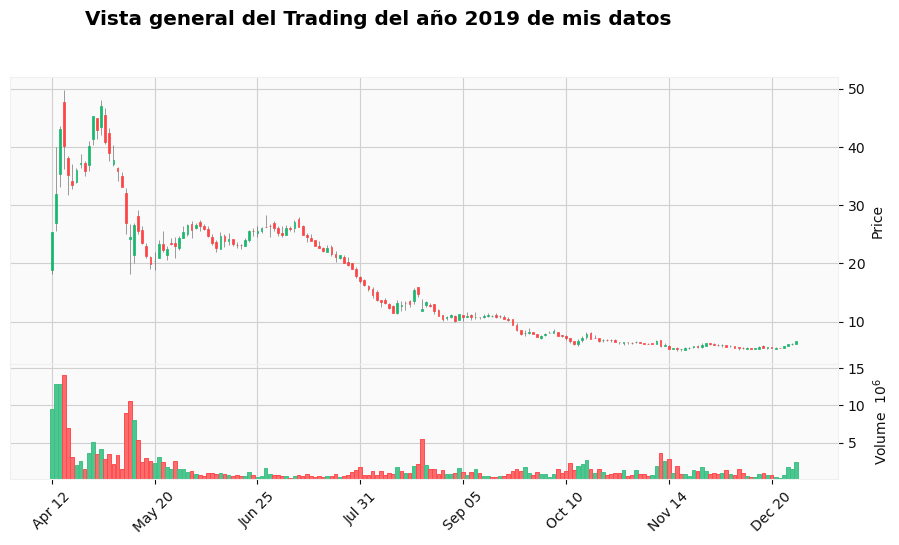

In [7]:
mpf.plot(df_2019,type="candle",volume=True,style="yahoo",figratio = (2, 1),title="Vista general del Trading del año 2019 de mis datos")

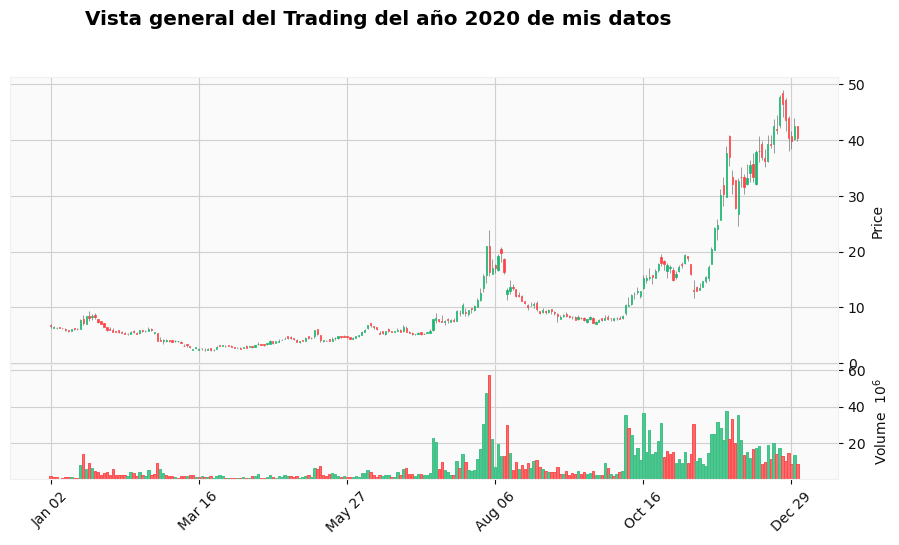

In [8]:
mpf.plot(df_2020,type="candle",volume=True,style="yahoo",figratio = (2, 1),title="Vista general del Trading del año 2020 de mis datos")

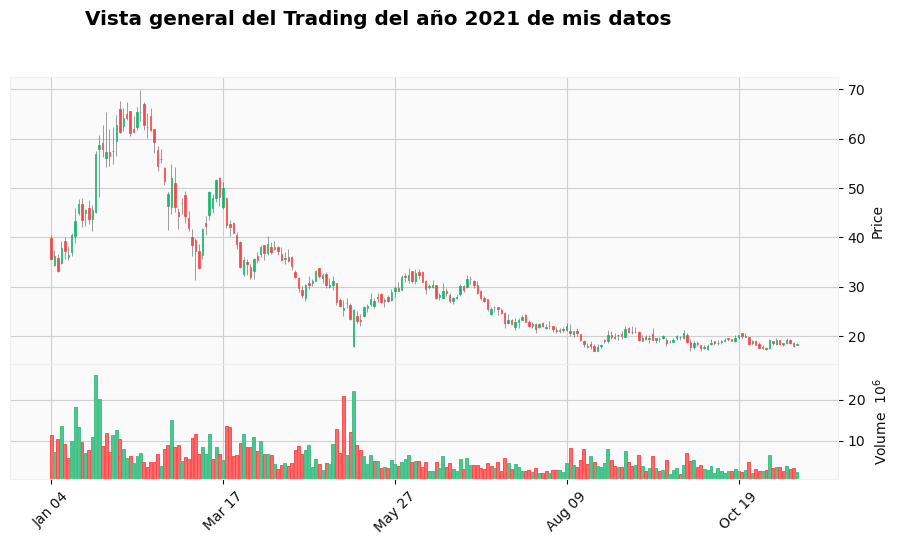

In [9]:
mpf.plot(df_2021,type="candle",volume=True,style="yahoo",figratio = (2, 1),title="Vista general del Trading del año 2021 de mis datos")

In [10]:
df_2019.describe().round(0)

,Open,High,Low,Close,Adj Close,Volume
count,182.0,182.0,182.0,182.0,182.0,182.0
mean,16.0,17.0,15.0,16.0,16.0,1655698.0
std,11.0,11.0,10.0,10.0,10.0,2173604.0
min,5.0,5.0,5.0,5.0,5.0,194100.0
25%,7.0,7.0,6.0,7.0,7.0,641650.0
50%,13.0,13.0,12.0,12.0,12.0,930050.0
75%,24.0,25.0,23.0,24.0,24.0,1693825.0
max,48.0,50.0,42.0,47.0,47.0,14110300.0


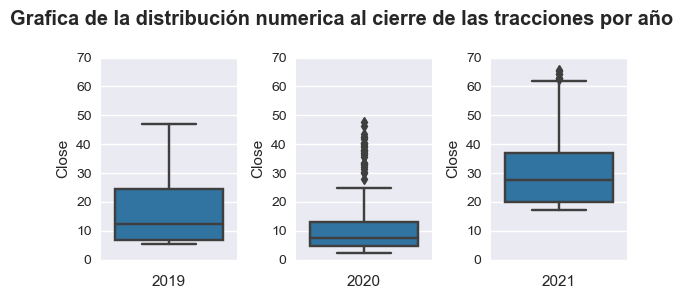

In [11]:
plt.style.use("seaborn")
fig, ax= plt.subplots(1,3,figsize=(6,3))
ax[0]=sns.boxplot(data=df_2019,y="Close",ax=ax[0],palette="tab10")
ax[0].set_ylim(0,70)
ax[0].set_xlabel("2019")
ax[1]=sns.boxplot(data=df_2020,y="Close",ax=ax[1],palette="tab10")
ax[1].set_ylim(0,70)
ax[1].set_xlabel("2020")
ax[2]=sns.boxplot(data=df_2021,y="Close",ax=ax[2],palette="tab10")
ax[2].set_ylim(0,70)
ax[2].set_xlabel("2021")
fig.suptitle("Grafica de la distribución numerica al cierre de las tracciones por año")
fig.tight_layout()

Con la grafica anterior podemos observar, como es la distribución de cierre de la cotizaciones de JUMIA por año. Cabe destacar, como en el 2020 se ve una considebrable volatilidad en los precios de cotización de esta empresa.

In [12]:
df["Year"]=df.index.year

In [13]:
df_gropu=df.groupby(["Year"])[["Open","Close"]].mean()

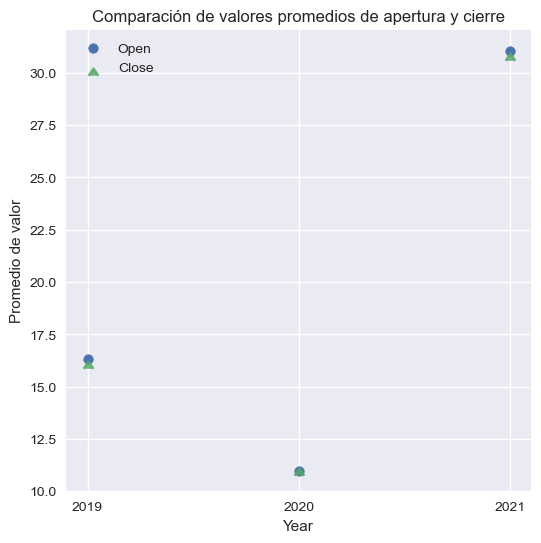

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(df_gropu.index,df_gropu["Open"],label="Open")
plt.scatter(df_gropu.index,df_gropu["Close"],alpha=0.8,marker=6,label="Close")
plt.legend(loc='upper left')
plt.xticks([2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Promedio de valor")
plt.title("Comparación de valores promedios de apertura y cierre")
plt.show()

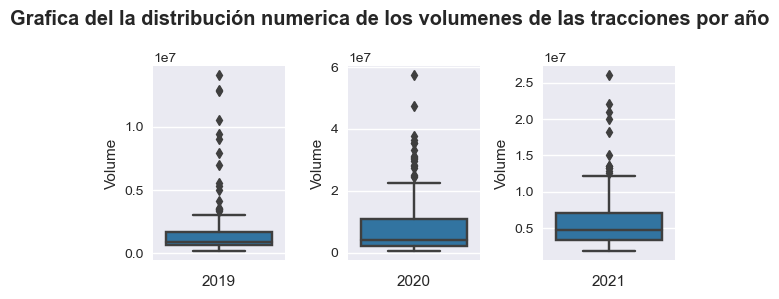

In [15]:
plt.style.use("seaborn")
fig, ax= plt.subplots(1,3,figsize=(6,3))
ax[0]=sns.boxplot(data=df_2019,y="Volume",ax=ax[0],palette="tab10")
ax[0].set_xlabel("2019")
ax[1]=sns.boxplot(data=df_2020,y="Volume",ax=ax[1],palette="tab10")
ax[1].set_xlabel("2020")
ax[2]=sns.boxplot(data=df_2021,y="Volume",ax=ax[2],palette="tab10")
ax[2].set_xlabel("2021")
fig.suptitle("Grafica del la distribución numerica de los volumenes de las tracciones por año")
fig.tight_layout()

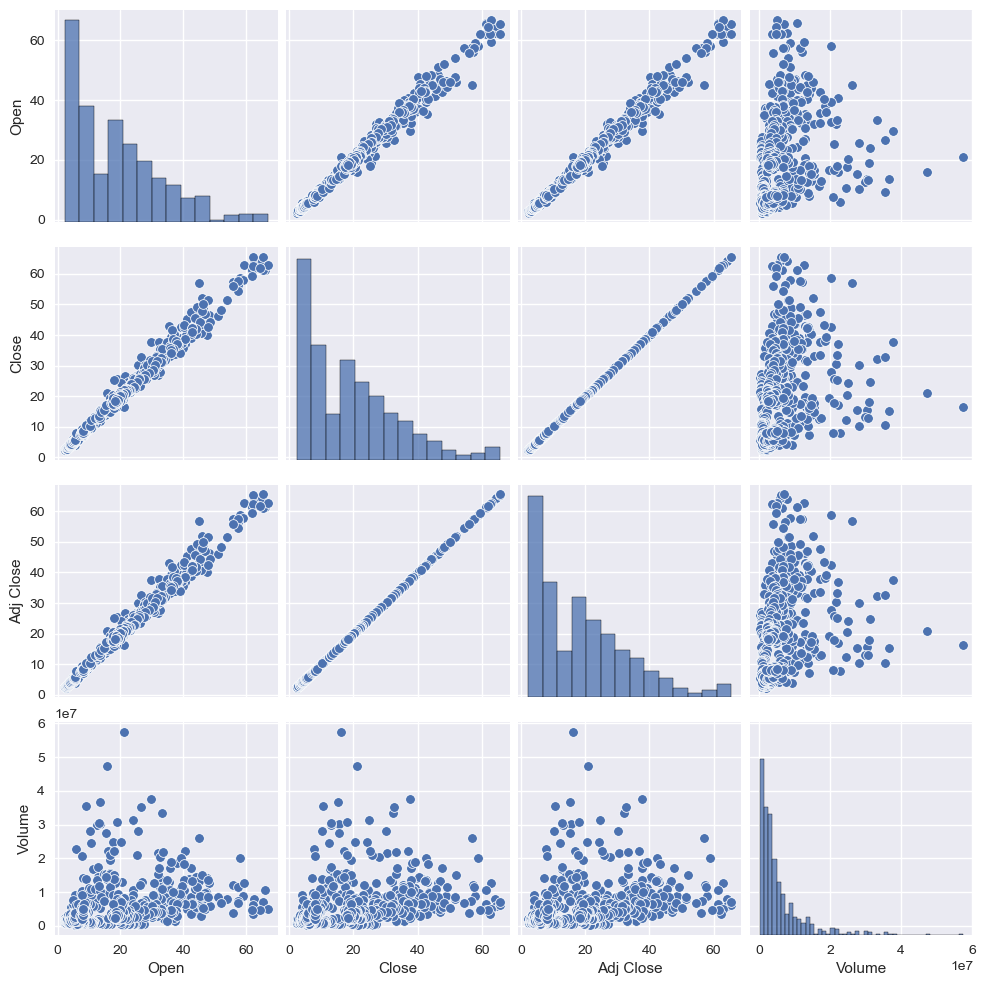

In [18]:
sns.pairplot(data=df.drop(["Year","High","Low"],axis=1))

<AxesSubplot:>

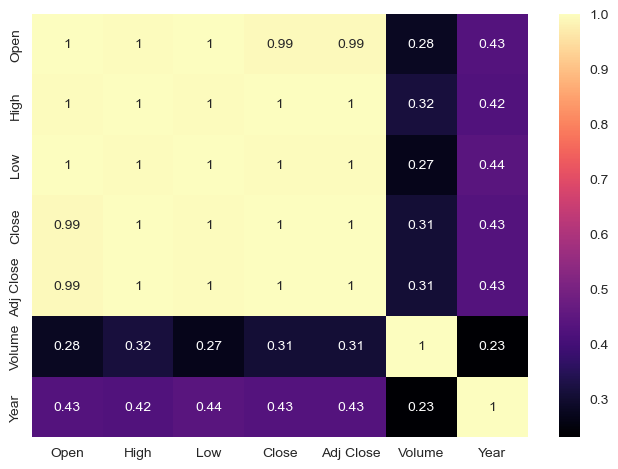

In [30]:
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap="magma")

# Conclusión 

* La baja cotización a finales del año 2019, responde al temor de las personas frente a la nueva virosis encontrada en China y obligado a entrar a diferentes países del mundo en un confinamiento total y prolongado. Sin embargo, más adelante nos damos cuenta de que al prolongarse este confinamiento, da pie al crecimiento de empresas de comprar virtuales. 

* Como podemos observar a lo largo de las gráficas superiores, vemos que el 2020 fue un año muy volátil en cuestión de la cotización de la empresa JUMIA. Impulsada por el confinamiento mundial y la gran demanda de compras a través de internet en este tiempo. Esto también se puede evidenciar, en los grandes volúmenes de transacciones realizados a finales del 2020 e inicios 2021.

* la reducción de las ventas en el 2021, donde cabe recalcar que el promedio de cotización para este año fue mayor en comparación con los demás, pero con una tendencia a la baja, se debe al retorno gradual de las personas a la normalidad antes de pandemia.

* En cuestión de datos, obtenemos unos resultados esperados. Pues la mayoría de datos, se relacionan entre sí y permiten realizar un buen modelo de machine Learning para predecir precios de cotización. 

